In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.spatial.distance import euclidean

myseed = 7
random.seed(myseed)
np.random.seed(myseed)

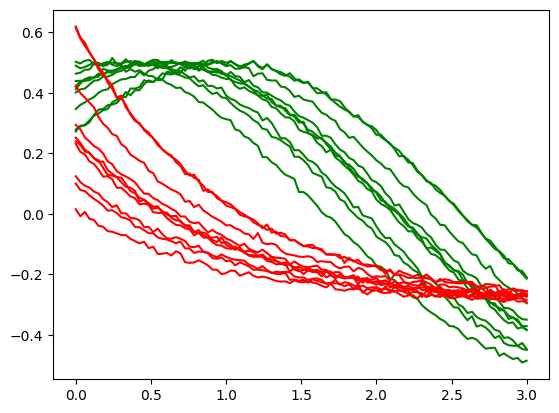

In [2]:
time = np.linspace(0, 3, num=100)
N = 10
timeseries = {'time': time}
rand = np.random.random(size=10)

for i in range(N):
    timeseries[f'sin{i}'] = 0.5 * np.sin(time +  rand[i] + 0.5)
    noise1 = np.random.normal(0, 0.006, len(timeseries[f'sin{i}']))
    timeseries[f'sin{i}'] = timeseries[f'sin{i}'] + noise1
for i in range(N):
    timeseries[f'exp{i}'] = np.exp(-(time + rand[i] * 1.2)) - 0.3
    noise2 = np.random.normal(0, 0.006, len(timeseries[f'exp{i}']))
    timeseries[f'exp{i}'] = timeseries[f'exp{i}'] + noise2

for i in range(N):
    plt.plot(time, timeseries[f'sin{i}'], '-g')
for i in range(N):
    plt.plot(time, timeseries[f'exp{i}'], '-r')

In [12]:
X = [] 
Y = []
for v in timeseries:
    if v!= 'time':
        X.append(timeseries[v])
        c = v[:-1]
        if c == "sin":
            Y.append(1)
        else:
            Y.append(2)

arr = np.arange(len(Y))
np.random.shuffle(arr)

X_train = []
X_test = []
Y_train = []
Y_test = []

for i in arr[:-5]:
    X_train.append(X[i])
    Y_train.append(Y[i])
for i in arr[len(X_train):]:
    X_test.append(X[i])
    Y_test.append(Y[i])

Y_test

[2, 1, 2, 1, 2]

In [79]:
def calculate_distance(w, s):
    distances = []
    for i in w:
        dist = np.sqrt((i - s) ** 2)
        distances.append(dist)
    return distances

In [3]:
def generate_shapelet_candidates(tsi, l):
    subsequences = []
    for start in range(len(tsi) - l + 1):
        subsequences.append(tsi[start:start+l])
    return subsequences

In [81]:
def evaluate_candidate_shapelets(s, dist, quality):
    information_gain = sum([-prob * np.log(prob)/np.log(2) if prob != 0 else 0 for prob in dist])
    return information_gain

In [82]:
def merge(p, rShapelets, shapelets):
    merged_shapelets = rShapelets + shapelets
    merged_shapelets = sorted(merged_shapelets, key=lambda x: x[1], reverse=True)
    merged_shapelets = merged_shapelets[:int(p * len(merged_shapelets))]

    return merged_shapelets

In [83]:
def discovery_shapelets(ts, min=3, max=100, r=200, quality=0.05):
    rShapelets = []
    numC = 2
    p = r / numC
    for tsi in ts:
        shapelets = []
        for l in range(min, max + 1):
            w = generate_shapelet_candidates(tsi, l)
            for s in w:
                dist = calculate_distance(w, s)
                qual = evaluate_candidate_shapelets(s, dist, quality)
                shapelets.append({qual: s})
        shapeletes = dict(sorted(shapeletes.items()))
        Shapelets = merge(p, rShapelets, shapelets)
    return Shapelets
        

In [84]:
shapelets = discovery_shapelets(timeseries)
for i in range(N):
    plt.plot(time, timeseries[f'sin{i}'], '-g')
    plt.plot(time, shapelets)

sin0
['sin', 'in0'] lolsin


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
from pyts.classification import TimeSeriesForest
 
clf = TimeSeriesForest(random_state=42)
clf.fit(X_train, Y_train)

print(f"Accuracy {clf.score(X_test, Y_test)}")
for i in range(len(Y_test)):
    print(f"{i + 1} объект:")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {Y_test[i]}")

In [ ]:
def discovery_of_shapelets(ts, max, r, min=3, quality=0.05):
    w = [[[]]]
    d = []
    rShapelets = []
    l = max - min
    numC = 2
    p = r / numC
    for ts_i, i in enumerate(ts):
        shapelets = []
        for l in range(min,max + 1):
            w[i][l] = generate_shapelets_candidates(ts_i, l)
            for s in w[i][l]:
                d[s] = euclidean(s, w[i][l])
                quality = evaluate_candidate_shapelets(s, d[s])
            if quality >= 0.05:
                shapelets.append([s, quality])
                shapelets = set(shapelets)
                shapelets = list(shapelets)
                rShapelets.extend(shapelets)


def generate_shapelets_candidates(ts_i, l):
    shapelets = []
    for i in range(len(ts_i) - l + 1):
        shapelets.append(ts_i[i:i+l])
    return shapelets

def evaluate_candidate_shapelets(s, d):
    entropy = calculate_entropy(s)
    information = calculate_information(s, d)
    quality = entropy * information
    return quality

def calculate_entropy(s):
char_counts = {}
for char in s:
if char in char_counts:
char_counts[char] += 1
else:
char_counts[char] = 1

entropy = 0.0
total_chars = len(s)

for count in char_counts.values():
probability = count / total_chars
entropy -= probability * math.log2(probability)

return entropy

def calculate_information(s, d):
information = len(s) / d
return information